Please do one of the following.


# Part I: Classification

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [42]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
import seaborn as sns

In [43]:
# Import Data
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv',index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [44]:
df['default'] = pd.get_dummies(df['default'])['Yes']
df['student'] = pd.get_dummies(df['student'])['Yes']
df.head()


,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

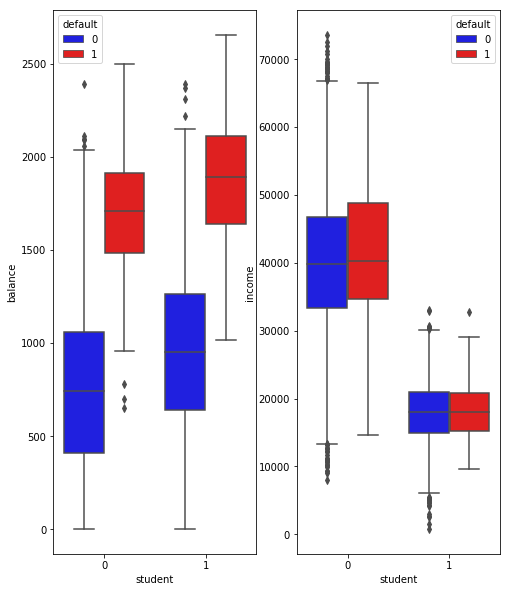

In [45]:
#Boxplot all variables
fig, ax = plt.subplots(figsize = (8, 10), ncols = 2)
seaborn.boxplot(x = 'student', y = 'balance', hue = 'default', palette=["blue", "red"],data = df, ax = ax[0])
seaborn.boxplot(x = 'student', y = 'income', hue = 'default', palette=["blue", "red"],data = df, ax = ax[1])
plt.show()

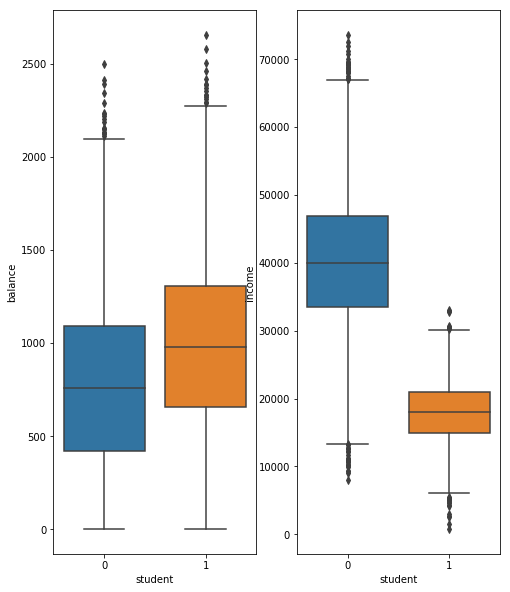

In [46]:
#Boxplot for student 
fig, ax = plt.subplots(figsize = (8, 10), ncols = 2)
seaborn.boxplot(x = 'student', y = 'balance', data = df, ax = ax[0])
seaborn.boxplot(x = 'student', y = 'income', data = df, ax = ax[1])
plt.show()

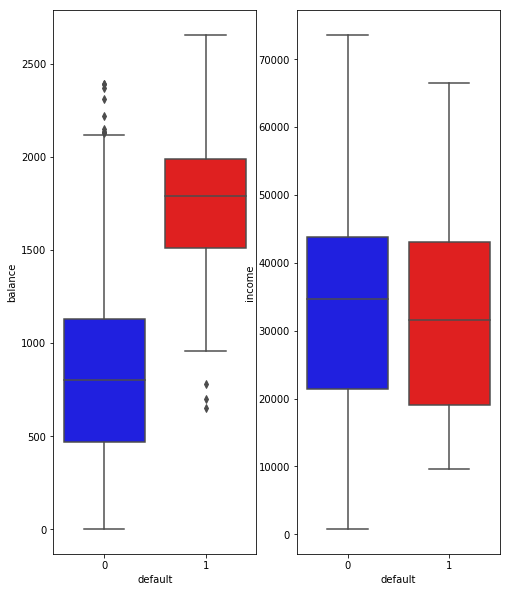

In [47]:
#Boxplot for default
fig, ax = plt.subplots(figsize = (8, 10), ncols = 2)
seaborn.boxplot(x = 'default', y = 'balance',palette=["blue", "red"],data = df, ax = ax[0])
seaborn.boxplot(x = 'default', y = 'income',palette=["blue", "red"],data = df, ax = ax[1])
plt.show()

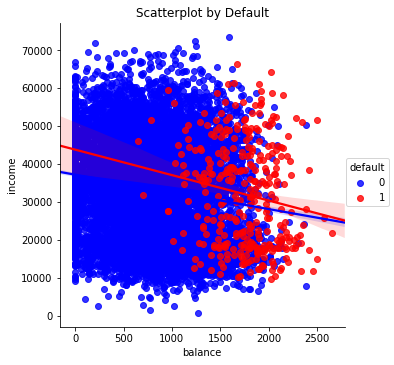

In [48]:
#Scatterplot
seaborn.lmplot(x = 'balance', y = 'income', data = df, hue = 'default',legend = True, palette = ['b','r'])
plt.title("Scatterplot by Default")
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

The accuracy rate is:  0.947368421053


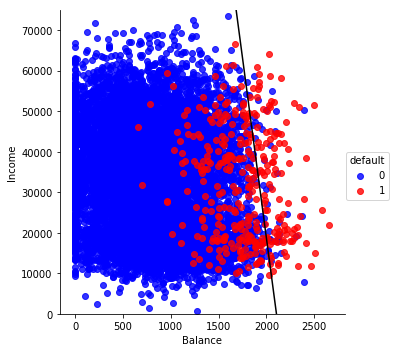

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score


###Model Building##
dfst = df[df['student'] == 1]
X = dfst.loc[: , ['balance','income']]
y = dfst['default']
#scaler = StandardScaler()
#X = X.as_matrix().astype(np.float)
#X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Fit Logistic Regression
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)

# Prediction
y_pred1 = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print('The accuracy rate is: ',accuracy)

##Decision Boundary##
coef = logreg.coef_[0]
intercept = logreg.intercept_

x_line = np.arange(0,2500,1)
y_line = (intercept + coef[0] * x_line)/(-coef[1])

seaborn.lmplot(x = 'balance', y = 'income', data = df, hue = 'default',legend = True, 
               fit_reg=False, palette = ['b','r'])
plt.plot(x_line,y_line,'black')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.ylim(0,75000)
plt.show()

Area under the ROC curve : %f 0.908805418719


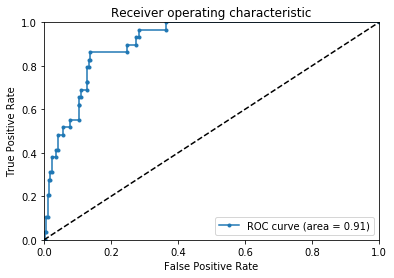

In [50]:
# Scale columns for regression.
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    
    # Construct training and testing set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f", roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

[[553   7]
 [ 24   5]]


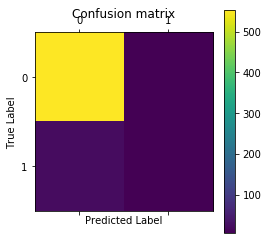

In [51]:
##Confusion Matrix##
from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve
def plot_confusion_matrix(y_cor, y_pred):
    confusion = confusion_matrix(y_cor, y_pred)
    print(confusion)
    
    # Plot 
    plt.matshow(confusion)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
plot_confusion_matrix(y_test,y_pred1)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

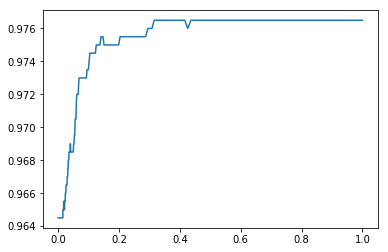

The test accuracy rate is:  0.9765
Area under the ROC curve :  0.696146291956


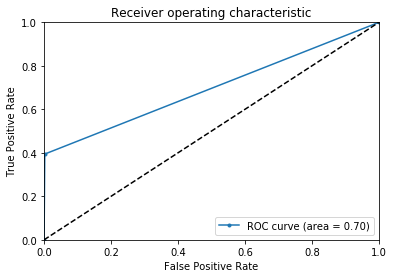

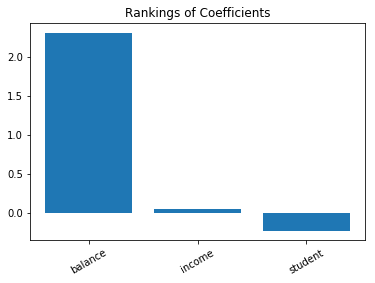

In [52]:
###Model Building##
X = df.loc[: , ['balance','income','student']]
y = df['default']
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Define alphas
alphas = np.logspace(-10,0,1000)
scores = []

# Find optimal alpha
for alpha in alphas:
    regr = LogisticRegression(penalty='l2',C=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))

# create the classifier with optimal value
index_optim = np.argmax(scores)
alpha_optim = alphas[index_optim]

plt.plot(alphas,scores)
plt.show()

optim = LogisticRegression(penalty='l2',C=alpha_optim)
optim.fit(X_train, y_train)
y_pred2 = optim.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('The test accuracy rate is: ', accuracy)

fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : ", roc_auc)

# ROC curve
generate_ROCplot(fpr,tpr,'LR',roc_auc)

# Rankings of coefficients
labels = ['balance', 'income', 'student']
index = np.arange(len(labels))
plt.bar(index, optim.coef_[0])
plt.xticks(index, labels, fontsize=10, rotation=30)
plt.title('Rankings of Coefficients')
plt.show()


[[1925    4]
 [  43   28]]


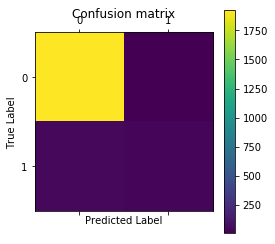

In [53]:
##Confusion Matrix##
from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve
def plot_confusion_matrix(y_cor, y_pred):
    confusion = confusion_matrix(y_cor, y_pred)
    print(confusion)
    
    # Plot 
    plt.matshow(confusion)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
plot_confusion_matrix(y_test,y_pred2)


######The effect of adding an extra variable: 

We can look at the ROCs of the two conditions: The student only data has area under the ROC curve 0.909 while the one with student variable has ROC 0.696, which means that without adding the new variable actually performs better in terms of ROC. But he accurracy is opposite, the one without student variable has accuracy rate 0.946 while with the variable has accuracy rate of 0.976.

But the results might not explain so much because we did not hold the method constant: for the first one we used lasso
(L1 regularization) and second we used ridge reregression (L2). However, we can still look at coefficient weights, because lasso has tendency to turn coefficients to 0. 


6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

In [54]:
from sklearn.model_selection import cross_val_score
X = df.loc[: , ['balance','income','student']]
y = df['default']
#Create k=10 folds
scores = cross_val_score(regr, X, y, cv = 10)
print(scores)

[ 0.96603397  0.96603397  0.96603397  0.966       0.967       0.967       0.966
  0.96596597  0.96696697  0.96596597]


###### Robustness
The fold k=10 is large enough and the score results are all over 0.960, which validate that the model is robust enough.

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [69]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy.random as nprnd
import random
import seaborn
%matplotlib inline

In [70]:
X = df.loc[: , ['balance','income','student']]
y = df['default']

# Train and test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Fit regression model in different max_depth
regr_5 = DecisionTreeRegressor(max_depth=5)
regr_5.fit(X_train, y_train)

# Predict
y_5 = regr_5.predict(X_test)

In [71]:
import pip 
pip.main(['install','pydotplus'])

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


0

In [72]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

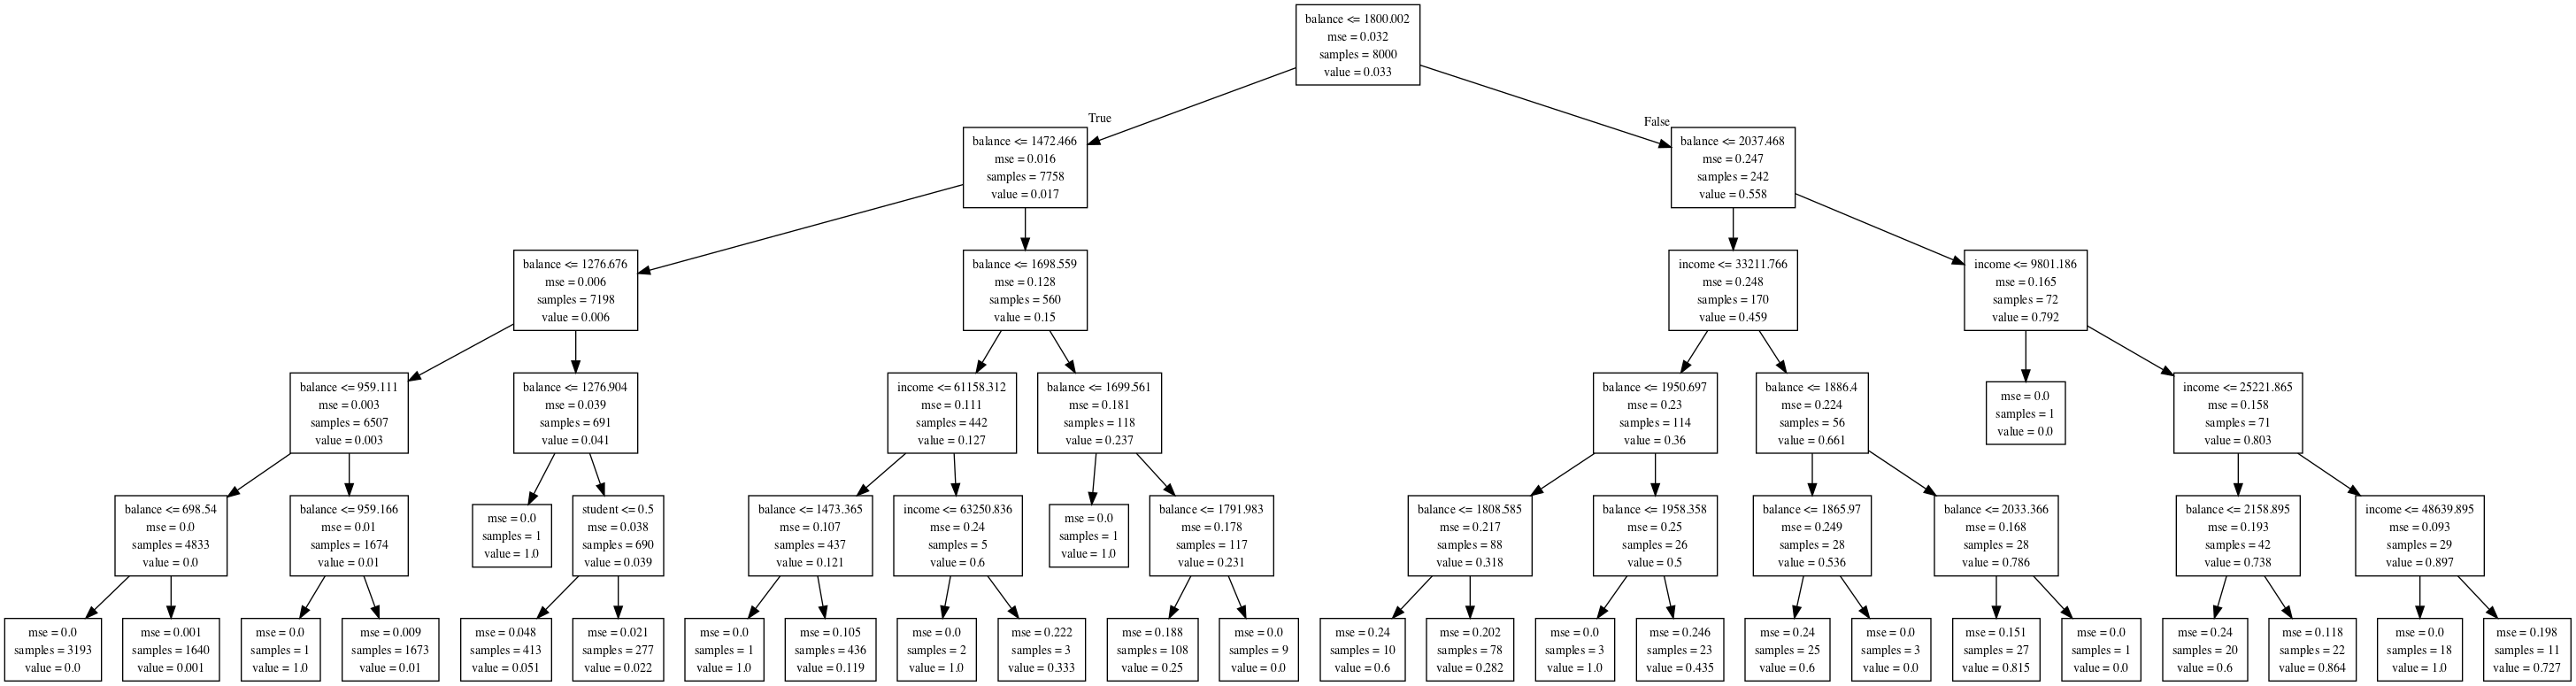

In [73]:
dot_data = StringIO()
export_graphviz(regr_5, out_file=dot_data,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

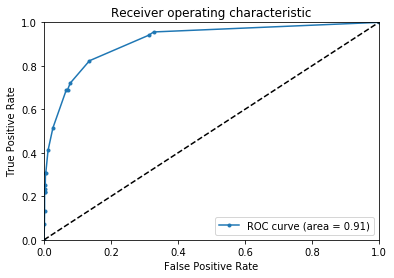

In [78]:
regr_5 = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
regr_5.fit(X_train,y_train)
probas_ = regr_5.predict_proba(X_test)    
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr,tpr)
generate_ROCplot(fpr,tpr,'LR',roc_auc)


The AUC ROC with depth of 5 is 0.91, which is less than 0.96 that from the  ridge regression results. The decision tree perform little bit less well compared with ridge regression.

8) Find the optimal decision tree depth and compute the AUC ROC. 

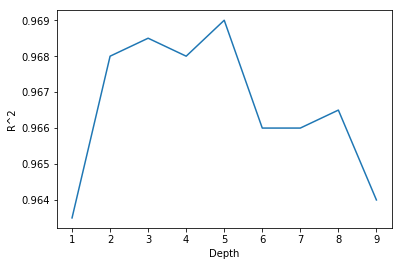

5

In [79]:
# Fit regression model
from sklearn.model_selection import train_test_split
X = df.loc[: , ['balance','income','student']]
y = df['default']

# Train and test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_errors=[]
test_errors=[]
scores=[]
depths = range(1,10)

for n in depths:
    regr = DecisionTreeClassifier(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
plt.show()
n_opt

From the result we can see that the optimal depth is 5 with largest R^2 value 0.969.

depth: 5
Area under the ROC curve : %f 0.915235659481


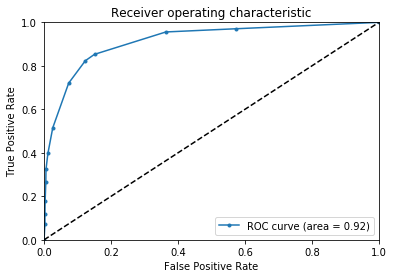

In [80]:
all_area=[]
print("depth:",n_opt)
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,max_depth = n_opt)
generate_ROCplot(fpr,tpr,'lr',roc_auc)
all_area.append(roc_auc)

The optimal value has AUC value 0.92.

# Part II: Recommendation Systems. 

In this problem we will use the notebook https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/matrix_factorization_recommender.ipynb  as
a starting point.

1) Split the ratings matrix R_df into training and testing sets. Remember we need to do this for rows and columns now. 

2) Evaluate the performance of the matrix factorization model for K=50K=50. In particular, measure the:

    Precision.
    Recall.

   You can round up or down to the nearest integer for the ratings. 


3) Construct an item/item and user/user model, and evaluate the performance as in 2). How does it compare?

4) Check how your answer to 3) changes (if at all) as you try different values of K for K=10, 20, 100. 